In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset inclusion :

dafrm_train = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
dafrm_test= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [3]:
dafrm_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
dafrm_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
print(dafrm_train.shape)
print(dafrm_test.shape)
dafrm_train.head()

(31647, 18)
(13564, 17)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
dafrm_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
# check for null values
dafrm_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
dafrm_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [9]:
#EDA
dafrm_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot: xlabel='subscribed', ylabel='count'>

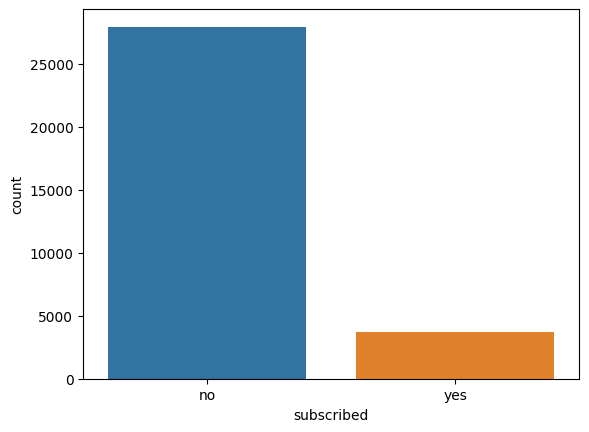

In [12]:
sns.countplot(data=dafrm_train, x='subscribed')

In [13]:
dafrm_train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [14]:
dafrm_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

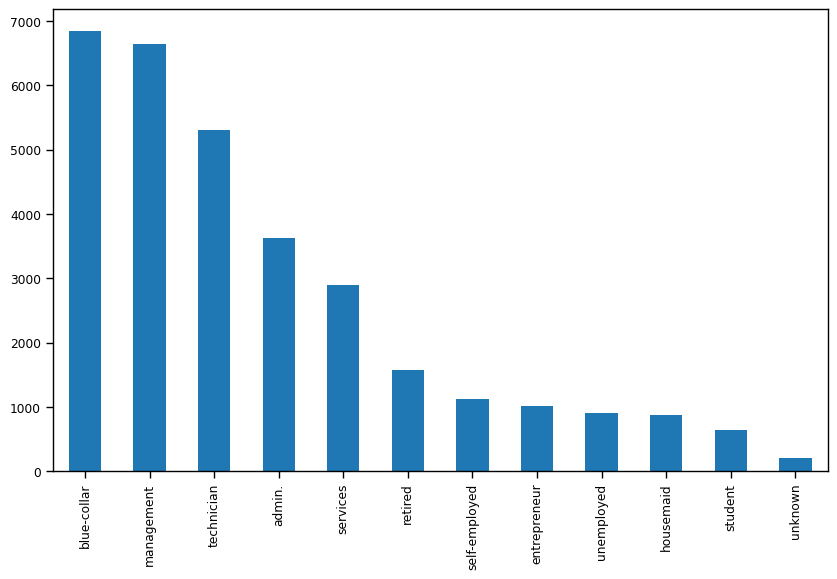

In [16]:
sns.set_context('paper')
dafrm_train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [17]:
dafrm_train['marital'].value_counts()


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

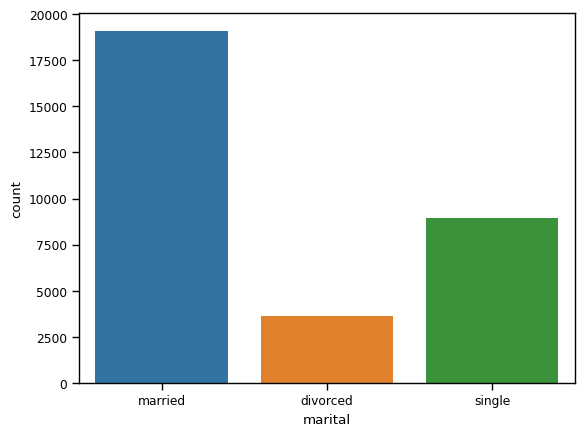

In [18]:
sns.countplot(data=dafrm_train, x='marital');


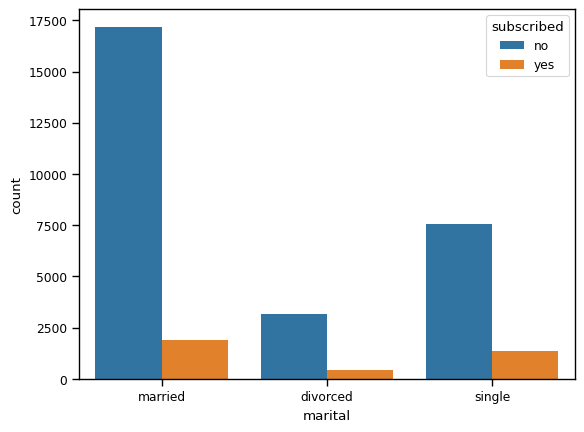

In [19]:
sns.countplot(data=dafrm_train, x='marital', hue='subscribed');

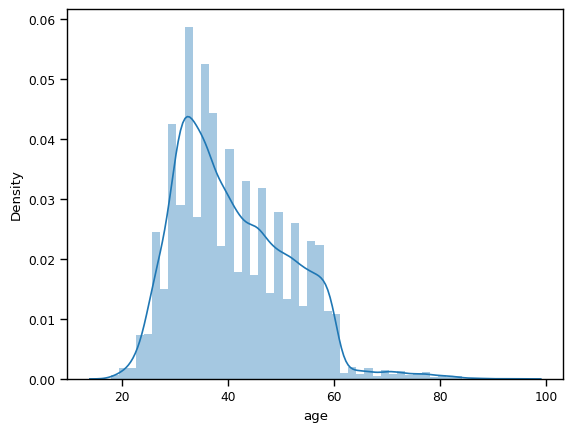

In [20]:
sns.distplot(dafrm_train['age']);

In [21]:
print(pd.crosstab(dafrm_train['job'],dafrm_train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [23]:
pd.crosstab(dafrm_train['marital'], dafrm_train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [24]:
pd.crosstab(dafrm_train['marital'], dafrm_train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [25]:
pd.crosstab(dafrm_train['marital'], dafrm_train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [27]:
pd.crosstab(dafrm_train['default'], dafrm_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [26]:
pd.crosstab(dafrm_train['default'], dafrm_train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [28]:
dafrm_train['subscribed'].replace('no', 0,inplace=True)
dafrm_train['subscribed'].replace('yes', 1,inplace=True)

In [29]:
dafrm_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [31]:
# Correlation against variables:
dafrm_train.corr()



,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot: >

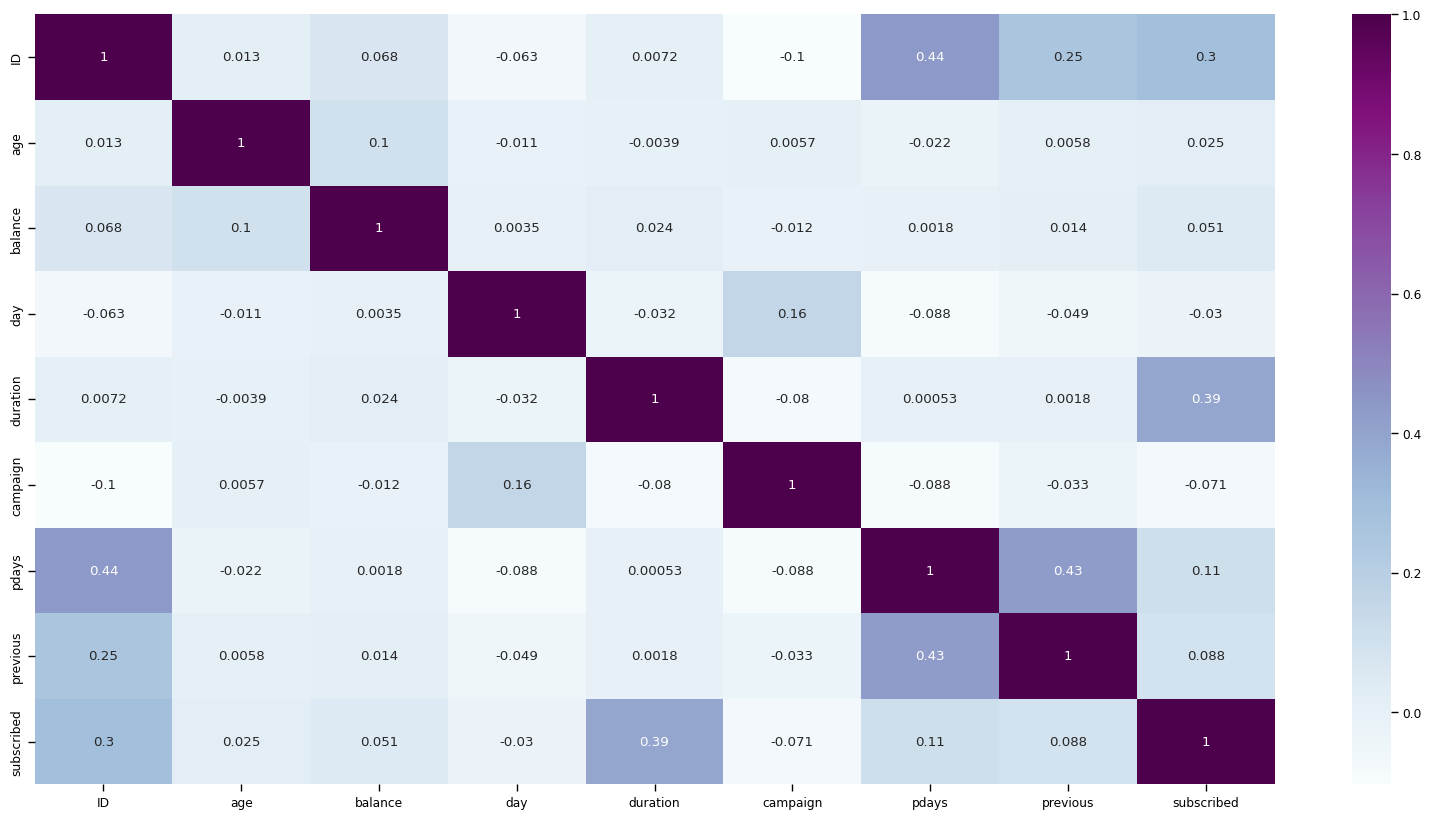

In [36]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(dafrm_train.corr(), annot=True,cmap = 'BuPu')

In [42]:
# Model configurations:

train = pd.get_dummies(dafrm_train)
target = train['subscribed']
train = train.drop('subscribed', axis=1)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=12)

In [60]:
#MODELLING (Importing Necessary libraries)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [62]:
dt = DecisionTreeClassifier(random_state = 42)
svm = SVC(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
ab=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()

In [63]:
# Define the list classifiers
classifiers = [
    ("dt" , dt),
    ("svm" , svm),
    ("rf" , rf),
    ("lr", lr),
    ("ab",ab),
    ("bc",bc),
    ("etc",etc),
    ("gbc",gbc)
    ]

In [64]:
# Dictionary to store accuracy and cross-validation scores
scores_dict = {}

for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print(f'{clf_name} score: {acc:.3f}')
    
    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv_score = cv_scores.mean()
    
    # Calculate the difference between accuracy and cross-validation score
    difference = acc - mean_cv_score
    
    # Store the results in the dictionary
    scores_dict[clf_name] = {
        'Accuracy': acc,
        'CrossValScores': cv_scores,
        'MeanCrossValScore': mean_cv_score,
        'Difference': difference
    }
    
    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print()

# Print the results
for clf_name, results in scores_dict.items():
    print(f"{clf_name}:")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Cross-validation scores:", results['CrossValScores'])
    print(f"Mean Cross-validation score: {results['MeanCrossValScore']:.2f}")
    print(f"Difference between Accuracy and Cross-validation score: {results['Difference']:.2f}")
    print()


dt score: 0.885
Confusion Matrix:
[[5225  383]
 [ 342  380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5608
           1       0.50      0.53      0.51       722

    accuracy                           0.89      6330
   macro avg       0.72      0.73      0.72      6330
weighted avg       0.89      0.89      0.89      6330


svm score: 0.886
Confusion Matrix:
[[5608    0]
 [ 722    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5608
           1       0.00      0.00      0.00       722

    accuracy                           0.89      6330
   macro avg       0.44      0.50      0.47      6330
weighted avg       0.78      0.89      0.83      6330


rf score: 0.907
Confusion Matrix:
[[5423  185]
 [ 401  321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97   

In [66]:
#As per accuracy, Cross validation scores,mean cross validation score and difference between accuracy and cross validation score RF is the best model for the given data set

In [68]:
import joblib
joblib.dump(RandomForestClassifier(random_state = 42),'PredictionModel')

['PredictionModel']

In [69]:
# Create a DataFrame to display the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the results
print(results.head())

       Actual  Predicted
21740       0          0
24830       0          0
17960       0          0
10489       0          0
27173       1          1
